In [82]:
import pandas as pd
import numpy as np
import os
print(os.listdir("./results"))

['results_CNN_1run_2', 'results_BidirectionalLSTM_3', 'results_CNN_1run_6', 'submission_CNNLSTM_8.csv', 'best_model_CNNLSTM_4.h5', 'best_model_BidirectionalLSTM_5.h5', 'best_model_CNN_1run_1.h5', 'best_model_BidirectionalLSTM_9.h5', 'submission_BidirectionalLSTM_3.csv', 'submission_CNN_1run_1.csv', 'best_model_CNN_1run_2.h5', 'results_CNNLSTM_0', 'results_BidirectionalLSTM_1', 'submission_CNNLSTM_2.csv', 'best_model_CNN_1run_3.h5', 'best_model_BidirectionalLSTM_8.h5', 'best_model_CNNLSTM_3.h5', 'results_BidirectionalLSTM_5', 'results_CNN_1run_5', 'project3-resultsval_accuracy.png', 'submission_CNN_1run_6.csv', 'submission_BidirectionalLSTM_8.csv', 'results_CNNLSTM_5', 'best_model_BidirectionalLSTM_6.h5', 'results_BidirectionalLSTM_6', 'best_model_CNNLSTM_2.h5', 'resnet_experimentloss.png', 'best_model_BidirectionalLSTM_2.h5', 'best_model_BidirectionalLSTM_1.h5', 'results_CNN_1run_3', 'best_model_CNN_1run_0.h5', 'best_model_CNNLSTM_6.h5', 'results_CNNLSTM_6', 'best_model_CNNLSTM_1.h5', 

In [83]:
results = os.listdir("./results")

In [84]:
results = [file for file in results if "results_" in file]

In [85]:
results_CNN = ["./results/" + file for file in results if "CNN_" in file]
results_LSTM = ["./results/" + file for file in results if "LSTM_" in file]
results_CNNLSTM = ["./results/" + file for file in results if "CNNLSTM_" in file]

In [86]:
import json

In [87]:
def read_results(paths):
    
    
    results = {'loss': [],
                'accuracy': [],
                'val_loss':[],
                'val_accuracy':[]}
    for path in paths:
        with open(path) as f:
            data = json.load(f)
            for k, v in data.items():
                try:
                    results[k].append(v)
                except:
                    pass
    output = {}
    for k, v in results.items():
        output[k + '_mean'] = np.array(v).mean(axis=0)
        output[k + '_std'] = np.array(v).std(axis=0)
    
    return output

In [88]:
results_CNN = read_results(results_CNN)
results_LSTM = read_results(results_LSTM)
results_CNNLSTM = read_results(results_CNNLSTM)

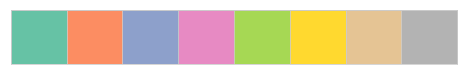

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.palplot(sns.color_palette("Set2"))
sns.set_palette("dark")

In [90]:
results = {"Arch. 1 - LSTM": results_LSTM,
           "Arch. 2 - CNN": results_CNN,
           "Arch. 3 - CNN & LSTM": results_CNNLSTM}

In [91]:
plots = {"Accuracy": 'accuracy',
        "Loss": 'loss',
        "Validation Accuracy": 'val_accuracy',
        "Validation Loss": 'val_loss'}
lims = False

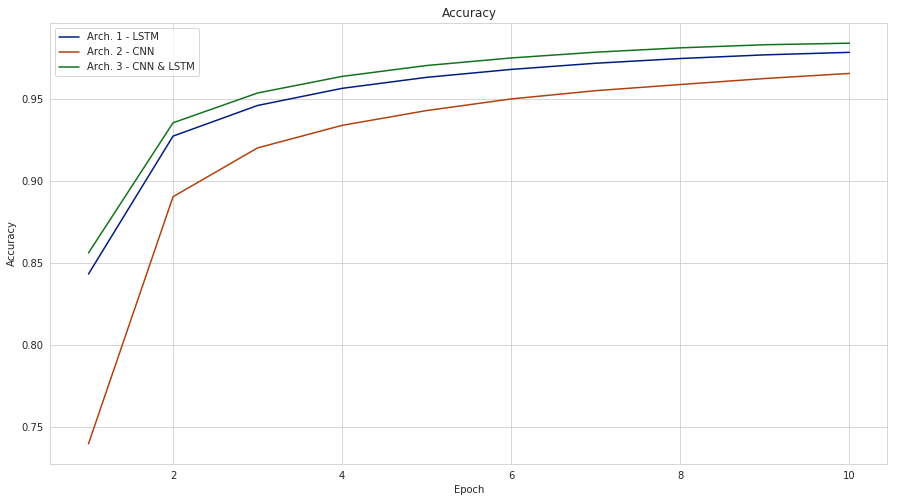

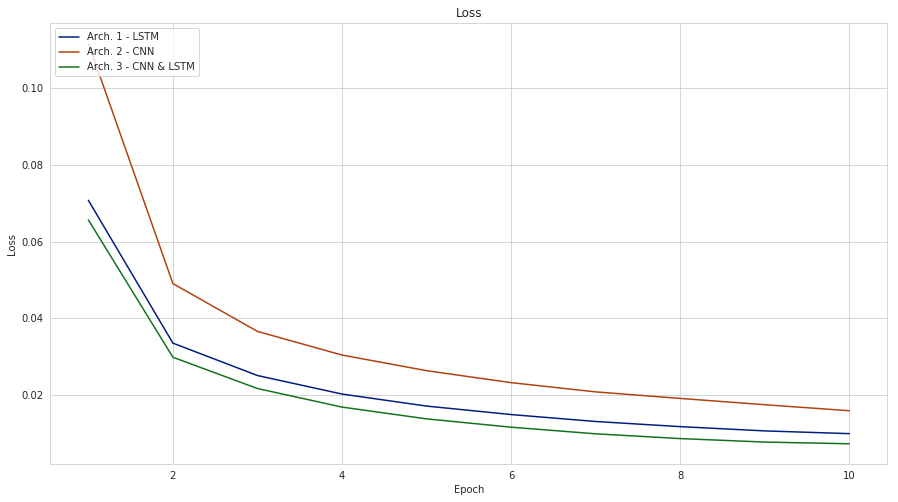

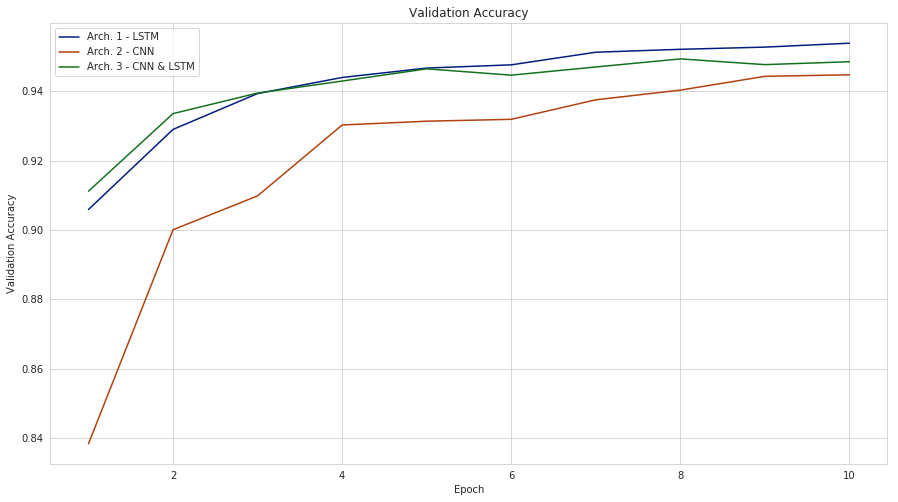

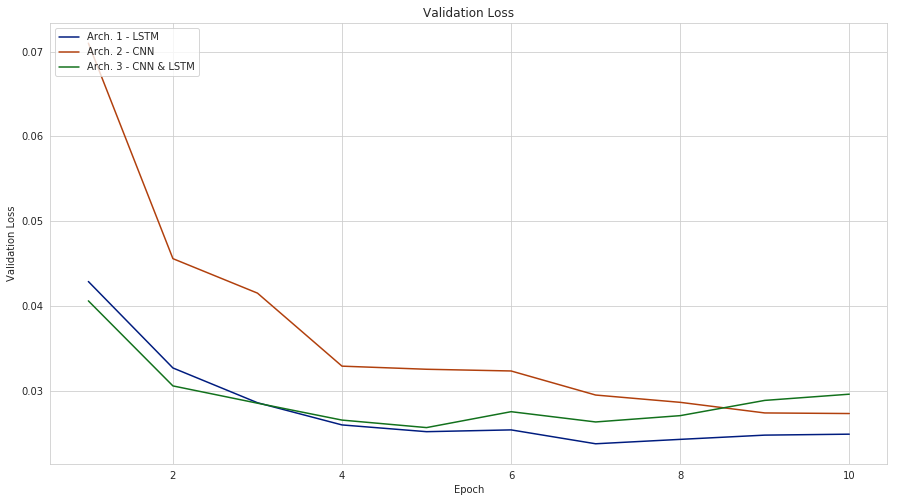

In [92]:

for k, v in plots.items():
    
    plt.figure(figsize=(15, 9))
    
    for name, architecture in results.items():
        plt.plot([i+1 for i in range(len(architecture[v + '_mean']))],
                 architecture[v + '_mean'],
                 label=name)

    plt.legend(loc='upper left')
    plt.title(k)
    plt.subplots_adjust(bottom=0.2)
    plt.ylabel(k)
    plt.xlabel("Epoch")
    plt.savefig('./results/project3-results' + v + '.png', bbox_inches='tight')
    plt.show()